In [4]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
import yfinance as yf
from yahoofinancials import YahooFinancials
yahoo_financials = YahooFinancials('BAJAJFINSV.NS')
data = yahoo_financials.get_historical_price_data(start_date='2002-08-12', 
                                                  end_date='2023-05-20', 
                                                  time_interval='daily')
bajaj_df = pd.DataFrame(data['BAJAJFINSV.NS']['prices'])
bajaj_df = bajaj_df.drop('date', axis=1).set_index('formatted_date')
bajaj_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2002-08-12,459.750000,450.100006,450.100006,453.399994,50600.0,444.552917
2002-08-13,454.500000,445.250000,454.500000,447.350006,25600.0,438.621002
2002-08-14,449.000000,416.000000,416.000000,434.799988,105200.0,426.315826
2002-08-15,434.799988,434.799988,434.799988,434.799988,0.0,426.315826
2002-08-16,441.000000,412.500000,412.500000,427.649994,143100.0,419.305359


In [6]:
bajaj_df['SMA90']=bajaj_df['close'].rolling(90).mean()

In [7]:
bajaj_df.tail()

,high,low,open,close,volume,adjclose,SMA90
formatted_date,,,,,,,
2023-05-15,1430.000000,1416.000000,1424.000000,1421.349976,1003664.0,1421.349976,1355.174447
2023-05-16,1438.000000,1421.000000,1429.900024,1428.349976,1678746.0,1428.349976,1353.846669
2023-05-17,1430.400024,1405.000000,1430.400024,1415.400024,804968.0,1415.400024,1352.323336
2023-05-18,1430.000000,1412.050049,1422.349976,1415.449951,739262.0,1415.449951,1350.683891
2023-05-19,1422.699951,1397.050049,1422.099976,1415.099976,754504.0,1415.099976,1349.208891


In [8]:
bajaj_df['EMA90'] = bajaj_df['close'].ewm( span = 90, adjust = False).mean()

In [9]:
bajaj_df.tail()

,high,low,open,close,volume,adjclose,SMA90,EMA90
formatted_date,,,,,,,,
2023-05-15,1430.000000,1416.000000,1424.000000,1421.349976,1003664.0,1421.349976,1355.174447,1382.624703
2023-05-16,1438.000000,1421.000000,1429.900024,1428.349976,1678746.0,1428.349976,1353.846669,1383.629654
2023-05-17,1430.400024,1405.000000,1430.400024,1415.400024,804968.0,1415.400024,1352.323336,1384.327904
2023-05-18,1430.000000,1412.050049,1422.349976,1415.449951,739262.0,1415.449951,1350.683891,1385.011905
2023-05-19,1422.699951,1397.050049,1422.099976,1415.099976,754504.0,1415.099976,1349.208891,1385.673181


<Axes: xlabel='formatted_date'>

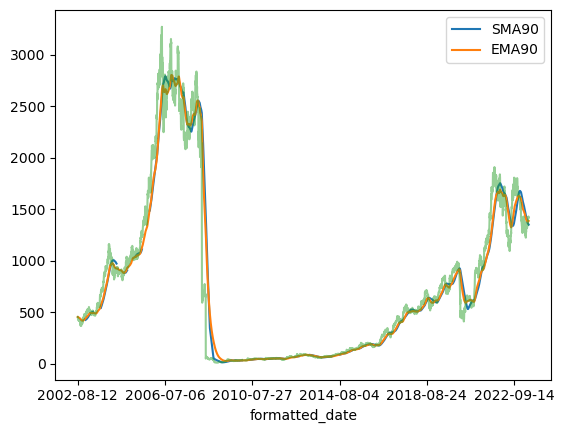

In [10]:
fig, ax = plt.subplots()
bajaj_df[[ 'SMA90', 'EMA90']].loc['2002-08-12':].plot(ax=ax)
bajaj_df['close'].loc['2002-08-12':].plot(ax=ax , alpha = 0.5)